# **<로지스틱 회귀분석 실습>**

<img src = "./fig/1_로지스틱회귀분석.PNG" width="60%">

<img src = "./fig/2_로지스틱회귀분석수식.PNG" width="60%">

In [1]:
%load_ext watermark
%watermark -v -p sklearn,numpy,scipy,matplotlib,statsmodels,seaborn

Python implementation: CPython
Python version       : 3.7.9
IPython version      : 7.18.1

sklearn    : 0.23.1
numpy      : 1.19.1
scipy      : 1.5.2
matplotlib : 3.2.1
statsmodels: 0.12.2
seaborn    : 0.11.1



In [2]:
from IPython.display import display, HTML

import warnings
warnings.filterwarnings('ignore')

In [3]:
# 데이터 전처리
import numpy as np
import pandas as pd

# 기계학습 모델 및 평가
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

# 실습예제1: Breast Cancer

#### 데이터 구조
- 데이터: 위스콘신 유방암 진단 데이터
- 관측치 개수: 569개
- 변수 개수: 32개 (ID, 진단결과, 30개 실측 값)

#### 각 세포에 대한 정보들 
- radius : 반경 (중심에서 외벽까지 거리들의 평균값)
- texture : 질감 (Gray-Scale 값들의 표준편차)
- perimeter : 둘레
- area : 면적
- smoothness : 매끄러움 (반경길이의 국소적 벼노하)
- compactness : 조그만 정도 (둘레^2/면적-1)
- concavity : 오목함(윤관의 오목한 부분의 정도)
- concave points : 오목한 점의 수
- symmetry : 대칭
- fractal dimension : 프랙탈 차원 (해안선근사-1)

- mean : 평균값
- error : 표준오차
- worst : 큰 값3개의 평균

#### 반응변수
- 양성여부 (malignant : 악성-0, Benign : 양성-1)

In [4]:
breast_cancer = load_breast_cancer()
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = pd.DataFrame(breast_cancer.target, columns=['target'])

data = pd.concat((X,y),axis=1)
display(data)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


## 탐색적 데이터 분석 및 데이터 전처리

### 데이터 shape 확인

In [6]:
print(f'관측치수 : {data.shape[0]} \n변수수 : {data.shape[1]}')

관측치수 : 569 
변수수 : 31


### 결측값 확인, 데이터 타입 확인 및 변경

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [8]:
data.target = data.target.astype('category')

### 간단한 요약 통계량 확인

In [9]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
data.target.value_counts()

1    357
0    212
Name: target, dtype: int64

### 그래프로 시각화하여 인사이트 얻기

<Figure size 576x576 with 0 Axes>

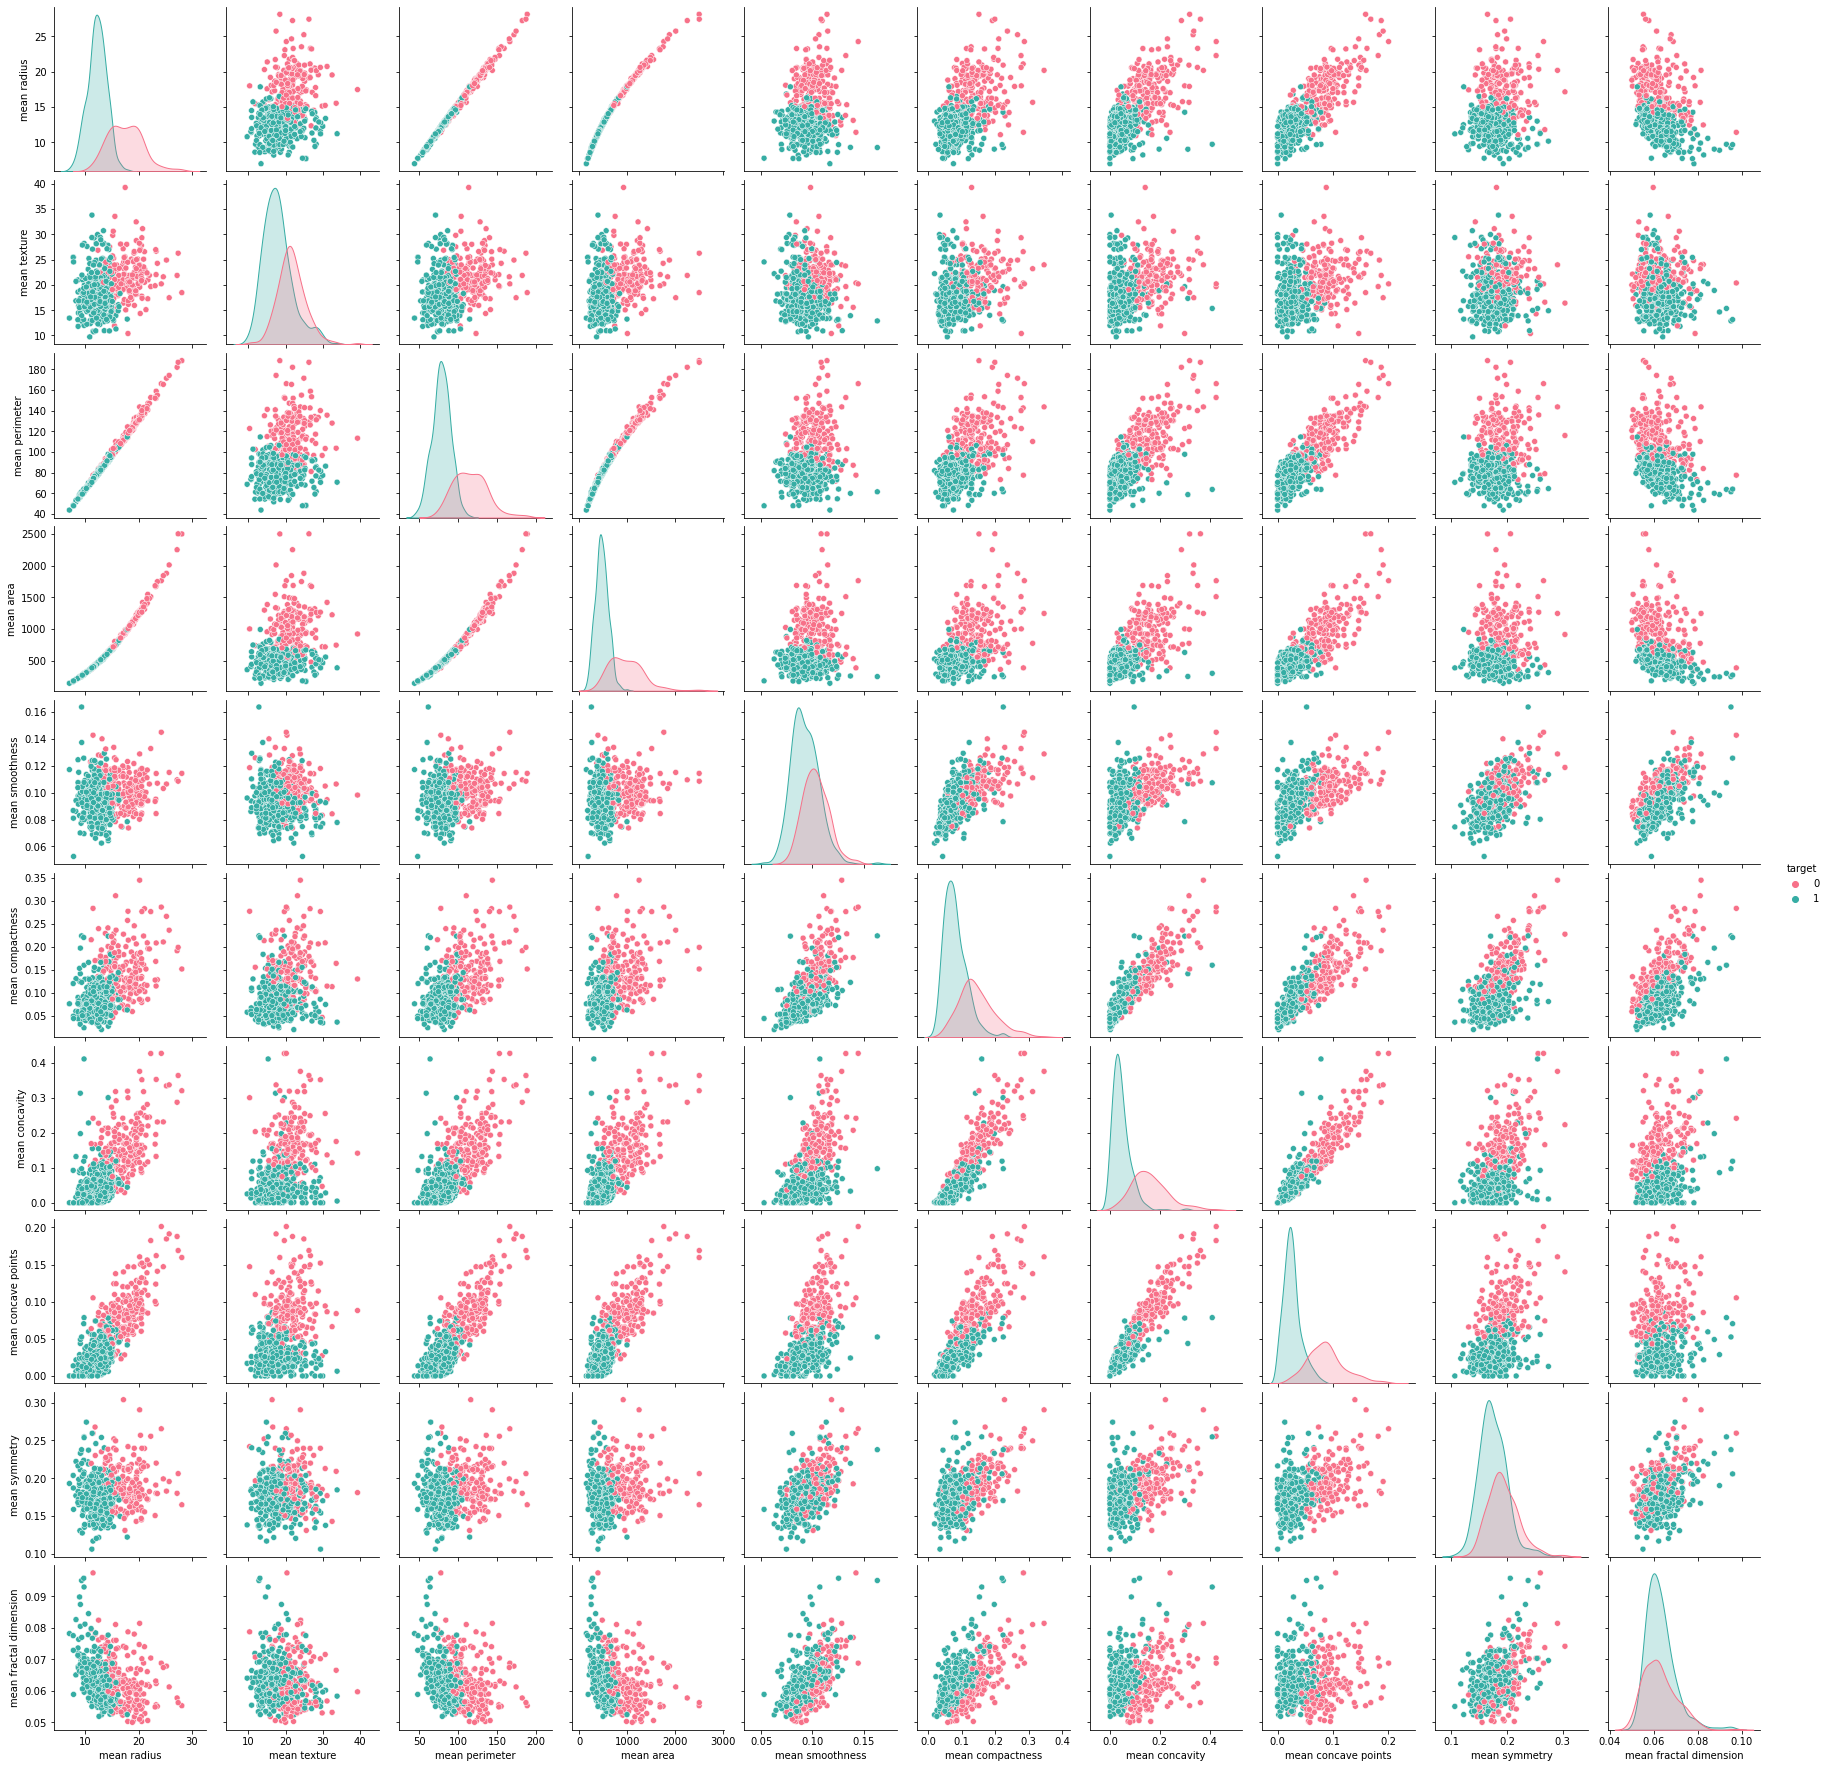

In [11]:
plt.figure(figsize = (8,8))
sns.pairplot(data[['mean radius', 'mean texture', 'mean perimeter', 'mean area',
                   'mean smoothness', 'mean compactness', 'mean concavity',
                   'mean concave points', 'mean symmetry', 'mean fractal dimension','target']],
             hue='target', palette="husl")
plt.show()

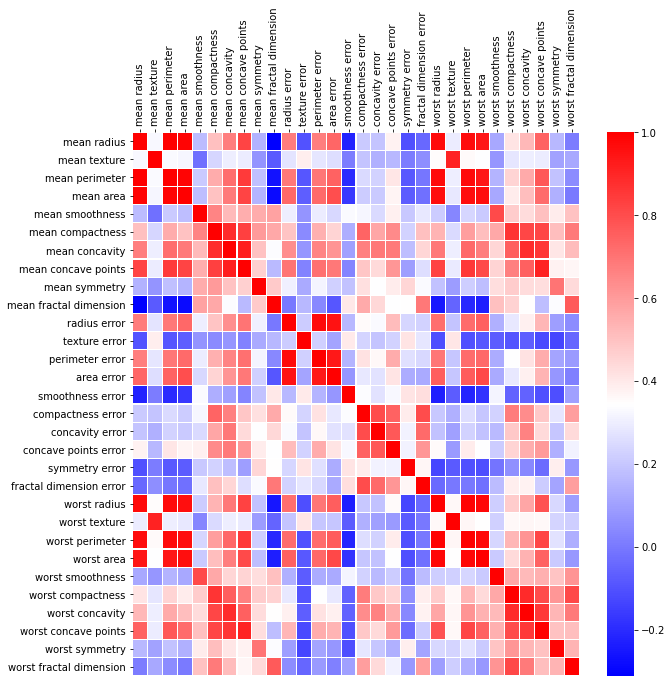

In [12]:
plt.figure(figsize=(10,10))
heat_map = sns.heatmap(data.corr(),
                       cmap='bwr',#https://matplotlib.org/examples/color/colormaps_reference.html
                       linewidths=.1)
heat_map.set_xticklabels(heat_map.get_xticklabels(),
                         rotation=90)
heat_map.xaxis.set_ticks_position('top')
plt.show()

### 타겟 변수의 클래스 비율 유지하며 Train/Test 데이터 분리
- 설명변수(X), 반응변수(y) 나누기

In [13]:
X = data.drop('target', axis=1)
display(X.head(3))
y = data['target']

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


- Training 데이터 70% / Testing 데이터 30% 나누기
- 클래스 비율 유지: train_test_split 함수 내 stratify 옵션

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=123, stratify=y)

### 정규화

In [15]:
preprocessor = preprocessing.Normalizer()
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

### 모델링
- sklearn.linear_model의 logistic 회귀모델 이용
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [16]:
model = LogisticRegression(penalty='none',
                           fit_intercept=True,
                           solver='newton-cg', # 
                           verbose=1, 
                           random_state=2017020558)
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


### 모델 결과 확인
- 다양한 분류 결과 확인
https://en.wikipedia.org/wiki/Confusion_matrix

In [17]:
print(f'학습 정오행렬 \n{confusion_matrix(y_train, pred_train)}')
print(f'테스트 정오행렬 \n{confusion_matrix(y_test, pred_test)}\n')
print(f'학습 정확도 : {accuracy_score(y_train, pred_train):.4f}')
print(f'테스트 정확도 : {accuracy_score(y_test, pred_test):.4f}')

학습 정오행렬 
[[144   4]
 [  0 250]]
테스트 정오행렬 
[[ 60   4]
 [  3 104]]

학습 정확도 : 0.9899
테스트 정확도 : 0.9591


In [18]:
def perf_eval(cm):
    # True positive rate: TPR
    TPR = cm[1, 1] / sum(cm[1]) # recall
    # True negative rate: TNR
    TNR = cm[0, 0] / sum(cm[0])
    # Simple Accuracy
    ACC = (cm[0, 0] + cm[1, 1]) / sum(cm.reshape(-1,))
    # F1-measure
    Precision = cm[1,1] /sum(cm[:,1])
    F1 = 2*TPR*Precision/(TPR+Precision)
    return ([TPR, TNR, ACC, F1])

In [19]:
cm_test = confusion_matrix(y_test, pred_test)
print('TPR:',perf_eval(cm_test)[0])
print('TNR:',perf_eval(cm_test)[1])
print('ACC:',perf_eval(cm_test)[2])
print('F1:',perf_eval(cm_test)[3])

TPR: 0.9719626168224299
TNR: 0.9375
ACC: 0.9590643274853801
F1: 0.9674418604651163


### 모델 결과물 확인
- 사용된 hyperparameter (사용자 지정 변수)
- 계수 : 1단위 증가할 때 로그아드의 변화량
- odd ratio 확인 : 1단위 증가할 때 변화하는 성공확률의 비율

In [20]:
model.get_params

<bound method BaseEstimator.get_params of LogisticRegression(penalty='none', random_state=2017020558, solver='newton-cg',
                   verbose=1)>

In [21]:
pd.DataFrame(np.concatenate((model.coef_.T, np.exp(model.coef_).T),axis=1), 
             index=breast_cancer.feature_names, 
             columns=['coefficient','odd ratio'])

,coefficient,odd ratio
mean radius,24575.740920,inf
mean texture,-162.201011,3.605754e-71
mean perimeter,-2751.048586,0.000000e+00
mean area,-233.280828,4.868819e-102
mean smoothness,2158.047762,inf
mean compactness,99099.187745,inf
mean concavity,-27060.111427,0.000000e+00
mean concave points,-77767.017497,0.000000e+00
mean symmetry,-6091.478903,0.000000e+00
mean fractal dimension,11905.869570,inf


In [22]:
model.intercept_

array([310.7267203])

### 클래스 판단 기준 바꿔서 결과 확인하기

In [23]:
pred_prob_train = model.predict_proba(X_train)
pred_prob_test = model.predict_proba(X_test)

In [24]:
pred_prob_test[:5]

array([[0.00000000e+00, 1.00000000e+00],
       [2.35809948e-02, 9.76419005e-01],
       [9.62183747e-01, 3.78162529e-02],
       [1.21087324e-08, 9.99999988e-01],
       [9.99997428e-01, 2.57171528e-06]])

In [25]:
threshold = 0.5
pred_train = pred_prob_train[:, 1] > threshold
pred_train = pred_train.astype('int')
display(confusion_matrix(y_train,pred_train))
pred_test = pred_prob_test[:, 1] > threshold
pred_test = pred_test.astype('int')
display(confusion_matrix(y_test,pred_test))

array([[144,   4],
       [  0, 250]], dtype=int64)

array([[ 60,   4],
       [  3, 104]], dtype=int64)

In [26]:
threshold = 0.9
pred_train = pred_prob_train[:, 1] > threshold
pred_train = pred_train.astype('int')
display(confusion_matrix(y_train,pred_train))
pred_test = pred_prob_test[:, 1] > threshold
pred_test = pred_test.astype('int')
display(confusion_matrix(y_test,pred_test))

array([[148,   0],
       [ 14, 236]], dtype=int64)

array([[ 61,   3],
       [  7, 100]], dtype=int64)

- 함수 정의하여 사용

In [27]:
# Cut-off 정의
def cut_off(y, threshold):
    Y = y.copy() # copy함수를 사용하여 이전의 y값이 변화지 않게 함
    Y[y > threshold] = 1
    Y[y <= threshold] = 0
    return(Y.astype(int))

In [28]:
threshold = 0.9
pred_train = cut_off(pred_prob_train[:, 1], threshold)
pred_test = cut_off(pred_prob_test[:, 1], threshold)
cm_train = confusion_matrix(y_train,pred_train)
cm_test = confusion_matrix(y_test,pred_test)
display(cm_train)
display(cm_test)

array([[148,   0],
       [ 14, 236]], dtype=int64)

array([[ 61,   3],
       [  7, 100]], dtype=int64)

In [29]:
thresholds = np.arange(0.5, 1.0, 0.05)
table = pd.DataFrame(columns=['TPR','TNR','ACC','F1'])

for i, th in enumerate(thresholds):
    pred_train_tmp = cut_off(pred_prob_train[:, 1], th)
    cm = confusion_matrix(y_train, pred_train_tmp)
    table.loc[th] = perf_eval(cm)

In [30]:
table.index.name='threshold'
table.columns.name='performance'
table

performance,TPR,TNR,ACC,F1
threshold,,,,
0.50,1.000,0.972973,0.989950,0.992063
0.55,1.000,0.979730,0.992462,0.994036
0.60,0.992,0.979730,0.987437,0.990020
0.65,0.988,0.986486,0.987437,0.989980
0.70,0.980,0.986486,0.982412,0.985915
0.75,0.976,0.986486,0.979899,0.983871
0.80,0.972,0.986486,0.977387,0.981818
0.85,0.960,0.993243,0.972362,0.977597
0.90,0.944,1.000000,0.964824,0.971193


### **ROC 커브** 
<img src = "./fig/3_ROC.PNG" width="60%">

In [31]:
def plot_ROC(y_train_true, y_train_prob, y_test_true, y_test_prob):
    '''
    a funciton to plot the ROC curve for train labels and test labels.
    Use the best threshold found in train set to classify items in test set.
    '''
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train_true, y_train_prob, pos_label =True)
    
    sum_sensitivity_specificity_train = tpr_train + (1-fpr_train)
    
    best_threshold_id_train = np.argmax(sum_sensitivity_specificity_train)
    best_threshold = thresholds_train[best_threshold_id_train]
    best_fpr_train = fpr_train[best_threshold_id_train]
    best_tpr_train = tpr_train[best_threshold_id_train]
    y_train = y_train_prob > best_threshold

    cm_train = confusion_matrix(y_train_true, y_train)
    acc_train = accuracy_score(y_train_true, y_train)
    auc_train = roc_auc_score(y_train_true, y_train)

    print('Train Accuracy: %s ' %acc_train)
    print('Train AUC: %s ' %auc_train)
    print('Train Confusion Matrix:')
    print(cm_train)

    
    # Plotting ROC Curve for Train 
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot(121)
    curve1 = ax.plot(fpr_train, tpr_train)
    curve2 = ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    dot = ax.plot(best_fpr_train, best_tpr_train, marker='o', color='black')
    ax.text(best_fpr_train, best_tpr_train, s = '(%.3f,%.3f)' %(best_fpr_train, best_tpr_train))
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve (Train), AUC = %.4f'%auc_train)

    fpr_test, tpr_test, thresholds_test = roc_curve(y_test_true, y_test_prob, pos_label =True)

    y_test = y_test_prob > best_threshold

    cm_test = confusion_matrix(y_test_true, y_test)
    acc_test = accuracy_score(y_test_true, y_test)
    auc_test = roc_auc_score(y_test_true, y_test)

    print('Test Accuracy: %s ' %acc_test)
    print('Test AUC: %s ' %auc_test)
    print('Test Confusion Matrix:')
    print(cm_test)

    tpr_score = float(cm_test[1][1])/(cm_test[1][1] + cm_test[1][0])
    fpr_score = float(cm_test[0][1])/(cm_test[0][0]+ cm_test[0][1])
    
    # Plotting ROC Curve for Test 
    ax2 = fig.add_subplot(122)
    curve1 = ax2.plot(fpr_test, tpr_test)
    curve2 = ax2.plot([0, 1], [0, 1], color='navy', linestyle='--')
    dot = ax2.plot(fpr_score, tpr_score, marker='o', color='black')
    ax2.text(fpr_score, tpr_score, s = '(%.3f,%.3f)' %(fpr_score, tpr_score))
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve (Test), AUC = %.4f'%auc_test)
    plt.savefig('ROC', dpi = 500)
    plt.show()

    return best_threshold

Train Accuracy: 0.9899497487437185 
Train AUC: 0.9878648648648649 
Train Confusion Matrix:
[[145   3]
 [  1 249]]
Test Accuracy: 0.9532163742690059 
Test AUC: 0.9500584112149533 
Test Confusion Matrix:
[[ 60   4]
 [  4 103]]


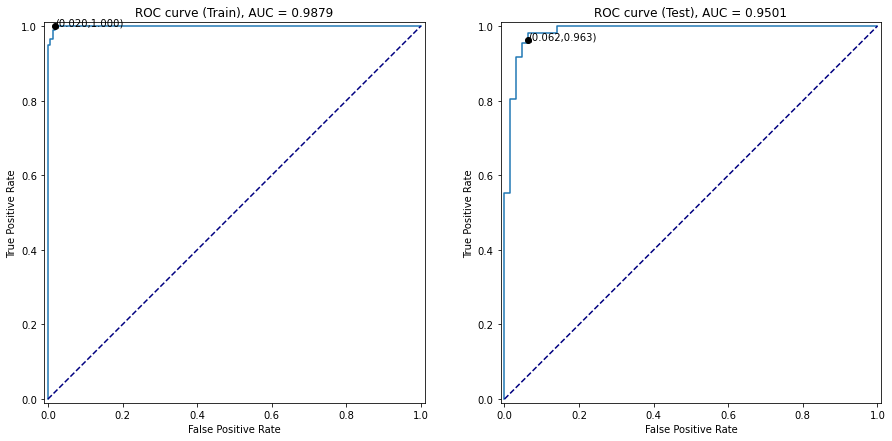

Cut-off: 0.5662058465363761


In [32]:
BestThreshold = plot_ROC(y_train, pred_prob_train[:,1], y_test, pred_prob_test[:,1])
print('Cut-off:', BestThreshold) # for training data

# 실습예제2 : Personal Loan 데이터셋

#### 모듈불러오기

In [33]:
%matplotlib inline
# 분석에 필요한 패키지 불러오기
import os
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt
import itertools
import time
import sklearn.preprocessing as preprocessing
import seaborn as sns


#### 독립변수 
- ID: 고객 ID
- Age: 고객 나이
- Experience: 고고객 직업 경험 수행기간
- Income: 연간 고객의 수입
- ZIPCode: 고객의 주소 ZIP 코드
- Family: 고객의 가구수
- CCAvg : 월 평균 고객의 신용카드 사용금액
- Education: 고객의 교육수준  1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage: 고객의 주택 담보 가치
- Securities Account: 고객의 증권계좌 보유여부
- CD Account: 고객의 예금증서 보유 여부
- Online: 고객의 온라인뱅킹 여부
- CreditCard: 고객의 신용카드 발급여부

#### 반응변수
-  Personal Loan(대출여부): 1 or 0

In [34]:
ploan = pd.read_csv("./data/Personal Loan.csv")
print( ploan.head(10) )

   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   
5   6   37          13      29     92121       4    0.4          2       155   
6   7   53          27      72     91711       2    1.5          2         0   
7   8   50          24      22     93943       1    0.3          3         0   
8   9   35          10      81     90089       3    0.6          2       104   
9  10   34           9     180     93023       1    8.9          3         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0

## **데이터 전처리**

#### **['ID','ZIP Code']** 와 같은 명목형 자료의 경우 본 데이터의 목적에 부합하는 변수가 아니라고 판단하여 이를 제거하겠습니다.

In [35]:
# 의미없는 변수 제거
ploan_processed = ploan.dropna().drop(['ID','ZIP Code'], axis=1, inplace=False)

## **상수항 추가**

#### 로지스틱 회귀분석에 있어서 상수(절편)에 해당하는 회귀계수를 알아가기 위해서 상수 변수를 추가하겠습니다.

In [36]:
ploan_processed = sm.add_constant(ploan_processed, has_constant='add')
print(ploan_processed.head(10) )

   const  Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0    1.0   25           1      49       4    1.6          1         0   
1    1.0   45          19      34       3    1.5          1         0   
2    1.0   39          15      11       1    1.0          1         0   
3    1.0   35           9     100       1    2.7          2         0   
4    1.0   35           8      45       4    1.0          2         0   
5    1.0   37          13      29       4    0.4          2       155   
6    1.0   53          27      72       2    1.5          2         0   
7    1.0   50          24      22       1    0.3          3         0   
8    1.0   35          10      81       3    0.6          2       104   
9    1.0   34           9     180       1    8.9          3         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0      

## 설명변수(X), 타켓변수(Y) 분리 및 학습데이터와 평가데이터 

In [37]:
feature_columns = list(ploan_processed.columns.difference(["Personal Loan"]))
X = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan'] # 대출여부: 1 or 0

In [38]:
train_x, test_x, train_y, test_y = train_test_split(X, y, stratify=y,train_size=0.7,test_size=0.3,random_state=42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1750, 12) (750, 12) (1750,) (750,)


In [39]:
ploan_processed.dtypes

const                 float64
Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

# 로지스틱회귀모형 모델링 y = f(x)

앞서 실습한 회귀분석과 마찬가지로 로지스틱 회귀모델도 statsmodels와 scikit-learn 두가지 패키지 모두 제공하고 있습니다. 우선적으로, statsmodels 패키지를 이용하여 로지스틱회귀모형을 적합하는 실습을 진행하도록 하겟습니다.

In [40]:
model = sm.Logit(train_y, train_x)
results = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.131055
         Iterations 9


|Element|Description|
|:----|:-----------|
|coef|	The estimated value of the coefficient|
|std err|	The basic standard error of the estimate of the coefficient. More sophisticated errors are also available.|
|t	|The t-statistic value. This is a measure of how statistically significant the coefficient is.|
|P > ㅣtㅣ|	P-value that the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response.|
|[95.0% Conf. Interval]|The lower and upper values of the 95% confidence interval|

In [41]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1738
Method:                           MLE   Df Model:                           11
Date:                Sun, 13 Jun 2021   Pseudo R-squ.:                  0.6030
Time:                        16:10:46   Log-Likelihood:                -229.35
converged:                       True   LL-Null:                       -577.63
Covariance Type:            nonrobust   LLR p-value:                2.927e-142
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0245      0.102      0.240      0.810      -0.175       0.224
CCAvg                  0.0985      0.063      1.562      0.118      -0.025       0.222
CD Account             4.3726      0.568      7.703      0.000       3.260       5.485
CreditCard            -1.2374      0.337     -3.667      0.000      -1.899      -0.576
Education              1.5203      0.190      7.999      0.000       1.148       1.893
Experience            -0.0070      0.102     -0.069      0.945      -0.206       0.192
Family                 0.7579      0.128      5.914      0.000       0.507       1.009
Income                 0.0547      0.004     12.659      0.000       0.046       0.063
Mortgage              -0.0001      0.001     -0.144      0.885      -0.002       0.002
Online                -0.4407      0.263     -1.674      0.094      -0.957       0.075
Securities Account    -1.8520      0.561     -3.299      0.001      -2.952      -0.752
const                -13.9203      2.773     -5.021      0.000     -19.354      -8.486
======================================================================================
"""

In [42]:
# performance measure
print("model AIC: ","{:.5f}".format(results.aic))

model AIC:  482.69329


# Cut-off에 따른 성능변화

In [43]:
pred_y = results.predict(train_x)
print(pred_y.head(10))

195     0.000041
2177    0.006228
1978    0.000599
1589    0.069734
1419    0.000051
77      0.002509
2172    0.017191
1416    0.004126
733     0.001416
648     0.000538
dtype: float64


## ***cut-off***: 확률값을 특정 임계값에 따라 범주형으로 변환하는 함수

In [44]:
# Cut-off에 따른 Confusion Matrix 변화
def cut_off(y,threshold):
    Y = y.copy() # copy함수를 사용하여 이전의 y값이 변화지 않게 함
    Y[Y>threshold]=1
    Y[Y<=threshold]=0
    return(Y.astype(int))

pred_Y = cut_off(pred_y,0.5)
print(pred_Y.head(10))

195     0
2177    0
1978    0
1589    0
1419    0
77      0
2172    0
1416    0
733     0
648     0
dtype: int32


## **Confusion matrix**

In [45]:
len(train_y)

1750

In [46]:
cfmat = confusion_matrix(train_y,pred_Y)
print(cfmat)


[[1550   21]
 [  60  119]]


### Compute confusion matrix to evaluate the accuracy of a classification
By definition a confusion matrix $ `C` $ is such that $C_{i, j}$
    is equal to the number of observations known to be in group $i$ but
    predicted to be in group $j$.
    Thus in binary classification, the count of true negatives is
    $ C_{0,0} $, false negatives is $C_{1,0}$, true positives is
    $C_{1,1} $ and false positives is $C_{0,1}$.


## perf_eval: 혼동행렬(confusion matrix)을 평가지표로 바꾸는 함수

In [47]:
def perf_eval(cm):
    # True positive rate: TPR
    TPR = cm[1, 1] / sum(cm[1]) # recall
    # True negative rate: TNR
    TNR = cm[0, 0] / sum(cm[0])
    # Simple Accuracy
    ACC = (cm[0, 0] + cm[1, 1]) / sum(cm.reshape(-1,))
    # Balanced Correction Rate
    BCR = np.sqrt(TPR * TNR)
    # F1-measure
    Precision = cm[1,1] /sum(cm[:,1])
    F1 = 2*TPR*Precision/(TPR+Precision)
    return ([TPR, TNR, ACC, BCR, F1])
print('TPR:',perf_eval(cfmat)[0])
print('TNR:',perf_eval(cfmat)[1])
print('ACC:',perf_eval(cfmat)[2])
print('BCR:',perf_eval(cfmat)[3])
print('F1:',perf_eval(cfmat)[4])

TPR: 0.664804469273743
TNR: 0.9866327180140039
ACC: 0.9537142857142857
BCR: 0.809887548038251
F1: 0.7460815047021944


## **임계값(cut-off)**에 따른 성능지표 비교

In [48]:
# 임계값에 따른 비교
threshold = np.arange(0,1,0.1)
table = pd.DataFrame(columns=['TPR','TNR','ACC','BCR','F1'])
for i in threshold:
    pred_Y = cut_off(pred_y,i)
    cfmat = confusion_matrix(train_y, pred_Y)
    table.loc[i] = perf_eval(cfmat)
table.index.name='threshold'
table.columns.name='performance'
print( table )

performance       TPR       TNR       ACC       BCR        F1
threshold                                                    
0.0          1.000000  0.000000  0.102286  0.000000  0.185588
0.1          0.865922  0.886696  0.884571  0.876248  0.605469
0.2          0.815642  0.940165  0.927429  0.875693  0.696897
0.3          0.754190  0.960535  0.939429  0.851132  0.718085
0.4          0.709497  0.975175  0.948000  0.831796  0.736232
0.5          0.664804  0.986633  0.953714  0.809888  0.746082
0.6          0.608939  0.994908  0.955429  0.778356  0.736486
0.7          0.541899  0.996817  0.950286  0.734966  0.690391
0.8          0.446927  1.000000  0.943429  0.668526  0.617761
0.9          0.379888  1.000000  0.936571  0.616351  0.550607


## Simple ROC curve

AUC: 0.9576649396000838


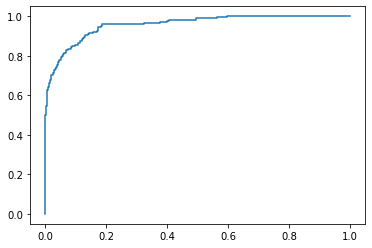

In [49]:
# sklearn ROC 패키지 제공
fpr, tpr, thresholds = metrics.roc_curve(train_y, pred_y, pos_label=1)

# Print ROC curve
plt.plot(fpr,tpr)

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

## **plot_ROC**: 학습데이터와 평가데이터의 ROC 커브와 최적의 임계값 확인

Train Accuracy: 0.8737142857142857 
Train AUC: 0.8851121407920799 
Train Confusion Matrix:
[[1368  203]
 [  18  161]]
Test Accuracy: 0.8973333333333333 
Test AUC: 0.9082900754520368 
Test Confusion Matrix:
[[602  71]
 [  6  71]]


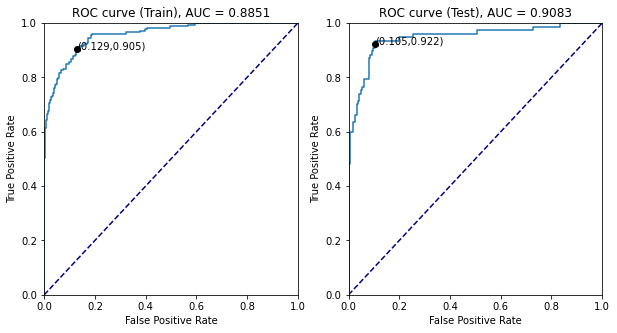

Cut-off: 0.0829937234417794


In [50]:
def plot_ROC(y_train_true, y_train_prob, y_test_true, y_test_prob):
    '''
    a funciton to plot the ROC curve for train labels and test labels.
    Use the best threshold found in train set to classify items in test set.
    '''
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train_true, y_train_prob, pos_label =True)
    sum_sensitivity_specificity_train = tpr_train + (1-fpr_train)
    best_threshold_id_train = np.argmax(sum_sensitivity_specificity_train)
    best_threshold = thresholds_train[best_threshold_id_train]
    best_fpr_train = fpr_train[best_threshold_id_train]
    best_tpr_train = tpr_train[best_threshold_id_train]
    y_train = y_train_prob > best_threshold

    cm_train = confusion_matrix(y_train_true, y_train)
    acc_train = accuracy_score(y_train_true, y_train)
    auc_train = roc_auc_score(y_train_true, y_train)

    print('Train Accuracy: %s ' %acc_train)
    print('Train AUC: %s ' %auc_train)
    print('Train Confusion Matrix:')
    print(cm_train)

    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(121)
    curve1 = ax.plot(fpr_train, tpr_train)
    curve2 = ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    dot = ax.plot(best_fpr_train, best_tpr_train, marker='o', color='black')
    ax.text(best_fpr_train, best_tpr_train, s = '(%.3f,%.3f)' %(best_fpr_train, best_tpr_train))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve (Train), AUC = %.4f'%auc_train)

    fpr_test, tpr_test, thresholds_test = roc_curve(y_test_true, y_test_prob, pos_label =True)

    y_test = y_test_prob > best_threshold

    cm_test = confusion_matrix(y_test_true, y_test)
    acc_test = accuracy_score(y_test_true, y_test)
    auc_test = roc_auc_score(y_test_true, y_test)

    print('Test Accuracy: %s ' %acc_test)
    print('Test AUC: %s ' %auc_test)
    print('Test Confusion Matrix:')
    print(cm_test)

    tpr_score = float(cm_test[1][1])/(cm_test[1][1] + cm_test[1][0])
    fpr_score = float(cm_test[0][1])/(cm_test[0][0]+ cm_test[0][1])

    ax2 = fig.add_subplot(122)
    curve1 = ax2.plot(fpr_test, tpr_test)
    curve2 = ax2.plot([0, 1], [0, 1], color='navy', linestyle='--')
    dot = ax2.plot(fpr_score, tpr_score, marker='o', color='black')
    ax2.text(fpr_score, tpr_score, s = '(%.3f,%.3f)' %(fpr_score, tpr_score))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve (Test), AUC = %.4f'%auc_test)
    plt.savefig('ROC', dpi = 500)
    plt.show()

    return best_threshold

BestThreshold = plot_ROC(y_train_true=train_y, y_train_prob=results.predict(train_x),
         y_test_true=test_y, y_test_prob=results.predict(test_x))
print('Cut-off:', BestThreshold) # for training data

# 실습예제3: Parkinsons 데이터셋
파킨슨데이터를 대상으로 로지스틱 회귀모형을 직접 수행해보도록 하겠습니다. 


In [51]:
# 데이터 처리
import numpy as np
import pandas as pd
# 머신러닝 알고리즘 및 평가
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

### 데이터 설명
-데이터 출처 : https://archive.ics.uci.edu/ml/datasets/Parkinson%27s+Disease+Classification|

In [52]:
# 데이터 불러오기
dat = pd.read_csv('./data/Classification_2_Parkinsons.csv')

# 데이터 확인해보기 상위 10개를 통해서

print(dat.head(10))



             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   
5  phon_R01_S01_6      120.552       131.162       113.787         0.00968   
6  phon_R01_S02_1      120.267       137.244       114.820         0.00333   
7  phon_R01_S02_2      107.332       113.840       104.315         0.00290   
8  phon_R01_S02_3       95.730       132.068        91.754         0.00551   
9  phon_R01_S02_4       95.056       120.103        91.226         0.00532   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  

In [53]:
# 데이터의 형태 확인해보기

print(dat.shape)


(195, 24)


In [54]:
# 의미없는 변수 제거: name

# name 변수 제거하기
dat_processing = dat.drop(['name'], axis=1, inplace=False)

print(dat_processing.columns)




Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')


In [55]:
# Normalization
dat_processing_norm = preprocessing.minmax_scale(dat_processing)
dat_processed = pd.DataFrame(dat_processing_norm)
dat_processed.columns = dat_processing.columns

In [56]:
print(dat_processed.shape)


(195, 23)


In [57]:
# 상수항 추가 : sm.add_constant()

dat_processed = sm.add_constant(dat_processed, has_constant='add')
print(dat_processed.head(20))


    const  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0     1.0     0.184308      0.112592      0.054815        0.195680   
1     1.0     0.198327      0.094930      0.278323        0.254130   
2     1.0     0.165039      0.059128      0.265288        0.280178   
3     1.0     0.165004      0.072927      0.264200        0.263342   
4     1.0     0.161150      0.080909      0.260107        0.354511   
5     1.0     0.187568      0.059232      0.278139        0.254130   
6     1.0     0.185909      0.071647      0.284086        0.052414   
7     1.0     0.110606      0.023873      0.223606        0.038755   
8     1.0     0.043063      0.061082      0.151289        0.121665   
9     1.0     0.039139      0.036658      0.148249        0.115629   
10    1.0     0.000000      0.020607      0.107062        0.107052   
11    1.0     0.020789      0.028019      0.119843        0.118170   
12    1.0     0.282892      0.117826      0.378827        0.039708   
13    1.0     0.2959

In [58]:
# 전체 데이터 변수 확인
print(dat_processed.columns)

Index(['const', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)',
       'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ',
       'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3',
       'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status',
       'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')


In [59]:
# Target 변수: 'status'를 제외한 데이터 학습데이터 구성하기
dat_processed.columns.difference(["status"])

Index(['D2', 'DFA', 'HNR', 'Jitter:DDP', 'MDVP:APQ', 'MDVP:Fhi(Hz)',
       'MDVP:Flo(Hz)', 'MDVP:Fo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)',
       'MDVP:PPQ', 'MDVP:RAP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'NHR',
       'PPE', 'RPDE', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:DDA', 'const',
       'spread1', 'spread2'],
      dtype='object')

In [60]:
feature_columns = list(dat_processed.columns.difference(["status"]))
feature_columns

['D2',
 'DFA',
 'HNR',
 'Jitter:DDP',
 'MDVP:APQ',
 'MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Fo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:PPQ',
 'MDVP:RAP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'NHR',
 'PPE',
 'RPDE',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'Shimmer:DDA',
 'const',
 'spread1',
 'spread2']

In [61]:
X = dat_processed[feature_columns]
y = dat_processed['status'] # 질환여부: 1 or 0

In [62]:
# train_test_split 함수를 이용하여 학습데이터와 검증데이터로 9:1로 나누어 데이터를 구분해보자.

train_x, test_x, train_y, test_y = train_test_split(X, y, stratify=y, test_size=0.1, random_state=2017010500)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)


(175, 23) (20, 23) (175,) (20,)


In [63]:
print(dat_processed.dtypes)


const               float64
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status              float64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object


In [64]:
print(train_y.head(10))
print(train_x.head(10))


178    1.0
89     1.0
126    1.0
8      1.0
193    0.0
174    0.0
186    0.0
92     1.0
37     1.0
47     0.0
Name: status, dtype: float64
           D2       DFA       HNR  Jitter:DDP  MDVP:APQ  MDVP:Fhi(Hz)  \
178  0.368467  0.749886  0.649069    0.040456  0.045180      0.114749   
89   1.000000  0.682231  0.139194    0.155402  0.209511      0.252682   
126  0.177061  0.653223  0.395716    0.109006  0.117926      0.194113   
8    0.400034  0.794025  0.543404    0.108525  0.076422      0.061082   
193  0.318222  0.277579  0.429936    0.145288  0.066544      0.601807   
174  0.200038  0.725879  0.691051    0.052015  0.045869      0.086390   
186  0.328600  0.371991  0.630619    0.089581  0.059116      1.000000   
92   0.409743  0.638319  0.420182    0.087655  0.178574      0.128283   
37   0.495243  0.834020  0.670975    0.066142  0.059116      0.170364   
47   0.269288  0.242711  0.746322    0.011559  0.010797      0.325264   

     MDVP:Flo(Hz)  MDVP:Fo(Hz)  MDVP:Jitter(%)  MDVP:Jitt

In [65]:
# 모델 구축 및 학습
# statsmodels의 Logit함수를 이용하여 모델을 적합해보자

model = sm.Logit(train_y, train_x)


In [66]:
# 모델을 실제로 적합해보자

results = model.fit(method='bfgs')


         Current function value: 0.281354
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


C:\Users\seok\.conda\envs\hynix\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [67]:
# performance measure
print("model AIC: ","{:.5f}".format(results.aic))
print("model BIC: ","{:.5f}".format(results.bic))
results.summary()

model AIC:  144.47407
model BIC:  217.26414


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 status   No. Observations:                  175
Model:                          Logit   Df Residuals:                      152
Method:                           MLE   Df Model:                           22
Date:                Sun, 13 Jun 2021   Pseudo R-squ.:                  0.4954
Time:                        16:10:47   Log-Likelihood:                -49.237
converged:                      False   LL-Null:                       -97.576
Covariance Type:            nonrobust   LLR p-value:                 2.442e-11
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
D2                   4.2639      3.099      1.376      0.169      -1.811      10.339
DFA                  0.0542      2.101      0.026      0.979      -4.063       4.171
HNR                 -0.9245      5.160     -0.179      0.858     -11.037       9.188
Jitter:DDP           0.6214   2451.293      0.000      1.000   -4803.824    4805.067
MDVP:APQ             1.2534     40.232      0.031      0.975     -77.600      80.107
MDVP:Fhi(Hz)        -1.4637      1.705     -0.858      0.391      -4.806       1.879
MDVP:Flo(Hz)        -0.3667      1.652     -0.222      0.824      -3.605       2.872
MDVP:Fo(Hz)         -2.2135      3.195     -0.693      0.488      -8.475       4.048
MDVP:Jitter(%)      -0.1070     31.153     -0.003      0.997     -61.166      60.952
MDVP:Jitter(Abs)     0.0709     18.843      0.004      0.997     -36.860      37.002
MDVP:PPQ             0.2336     32.602      0.007      0.994     -63.665      64.132
MDVP:RAP             0.6204   2451.955      0.000      1.000   -4805.122    4806.363
MDVP:Shimmer         1.1246     81.756      0.014      0.989    -159.114     161.363
MDVP:Shimmer(dB)     1.0381     32.839      0.032      0.975     -63.325      65.401
NHR                  0.0104     12.874      0.001      0.999     -25.222      25.242
PPE                  4.1208     10.097      0.408      0.683     -15.669      23.910
RPDE                -3.4806      2.004     -1.737      0.082      -7.409       0.448
Shimmer:APQ3         0.5714   5440.328      0.000      1.000   -1.07e+04    1.07e+04
Shimmer:APQ5         1.2993     25.642      0.051      0.960     -48.957      51.556
Shimmer:DDA          0.5705   5438.660      0.000      1.000   -1.07e+04    1.07e+04
const               -1.7935      4.920     -0.365      0.715     -11.436       7.849
spread1              4.5679      7.896      0.578      0.563     -10.908      20.044
spread2              3.6718      2.343      1.567      0.117      -0.920       8.264
====================================================================================
"""

In [68]:
# 실제 Train 학습의 예측값을 출력해보자.

train_y_pred = results.predict(train_x)
print(train_y_pred.head(10))


178    0.754379
89     0.999763
126    0.473022
8      0.965055
193    0.376182
174    0.850443
186    0.151406
92     0.893159
37     0.908429
47     0.012054
dtype: float64


In [69]:
# 실제 Test데이터의 예측값을 출력해보자.

test_y_pred = results.predict(test_x)
print(test_y_pred.head(20))


139    0.896587
70     0.921018
167    0.032148
143    0.710512
157    0.999480
95     0.855700
26     0.866141
25     0.990939
192    0.821703
108    0.609142
123    0.688141
172    0.845136
43     0.136289
67     0.968164
164    0.999518
180    0.878394
190    0.832943
125    0.451190
101    0.999631
144    0.731930
dtype: float64


In [70]:
# Cut-off 정의
def cut_off(y,threshold):
    Y = y.copy() # copy함수를 사용하여 이전의 y값이 변화지 않게 함
    Y[Y>threshold]=1
    Y[Y<=threshold]=0
    return(Y.astype(int))

In [71]:
train_y_pred_prob = results.predict(train_x)
train_y_pred = cut_off(train_y_pred_prob,0.5)
print( train_y_pred.head(10) )

178    1
89     1
126    0
8      1
193    0
174    1
186    0
92     1
37     1
47     0
dtype: int32


In [72]:
test_y_pred_prob = results.predict(test_x)
test_y_pred = cut_off(test_y_pred_prob,0.5)
print( test_y_pred.head(20) )

139    1
70     1
167    0
143    1
157    1
95     1
26     1
25     1
192    1
108    1
123    1
172    1
43     0
67     1
164    1
180    1
190    1
125    0
101    1
144    1
dtype: int32


In [73]:
test_y_pred_prob = results.predict(test_x)
test_y_pred = cut_off(test_y_pred_prob,0.5)
print( test_y_pred.head(10) )

139    1
70     1
167    0
143    1
157    1
95     1
26     1
25     1
192    1
108    1
dtype: int32


In [74]:
# confusion matrix: Training set
cm_train = confusion_matrix(train_y,train_y_pred)
print( cm_train )

[[ 27  16]
 [ 10 122]]


In [75]:
# confusion matrix: Test set
cm_test = confusion_matrix(test_y,test_y_pred)
print( cm_test)

[[ 2  3]
 [ 1 14]]


In [76]:
# performance evaluation
def perf_eval(cm):
    # True positive rate: TPR
    TPR = cm[1, 1] / sum(cm[1]) # recall
    # True negative rate: TNR
    TNR = cm[0, 0] / sum(cm[0])
    # Simple Accuracy
    ACC = (cm[0, 0] + cm[1, 1]) / sum(cm.reshape(-1,))
    # Balanced Correction Rate
    BCR = np.sqrt(TPR * TNR)
    # F1-measure
    Precision = cm[1,1] /sum(cm[:,1])
    F1 = 2*TPR*Precision/(TPR+Precision)
    return ([TPR, TNR, ACC, BCR, F1])

In [77]:

print('Test performance of Logistic Regression')
print('TPR:',perf_eval(cm_test)[0])
print('TNR:',perf_eval(cm_test)[1])
print('ACC:',perf_eval(cm_test)[2])
print('BCR:',perf_eval(cm_test)[3])
print('F1:',perf_eval(cm_test)[4])

Test performance of Logistic Regression
TPR: 0.9333333333333333
TNR: 0.4
ACC: 0.8
BCR: 0.6110100926607787
F1: 0.8749999999999999


In [78]:
# 임계값에 따른 비교
threshold = np.arange(0, 1, 0.1)
threshold

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [79]:
table = pd.DataFrame(columns=['TPR','TNR','ACC','BCR','F1'])
print(table)

Empty DataFrame
Columns: [TPR, TNR, ACC, BCR, F1]
Index: []


In [80]:
for i in threshold:
    test_y_pred_tmp = cut_off(test_y_pred_prob,i)
    cfmat = confusion_matrix(test_y, test_y_pred_tmp)
    table.loc[i] = perf_eval(cfmat)

In [81]:
table.index.name='threshold'
table.columns.name='performance'
print(table)

performance       TPR  TNR   ACC       BCR        F1
threshold                                           
0.0          1.000000  0.0  0.75  0.000000  0.857143
0.1          1.000000  0.2  0.80  0.447214  0.882353
0.2          1.000000  0.4  0.85  0.632456  0.909091
0.3          1.000000  0.4  0.85  0.632456  0.909091
0.4          1.000000  0.4  0.85  0.632456  0.909091
0.5          0.933333  0.4  0.80  0.611010  0.875000
0.6          0.933333  0.4  0.80  0.611010  0.875000
0.7          0.800000  0.4  0.70  0.565685  0.800000
0.8          0.666667  0.4  0.60  0.516398  0.714286
0.9          0.400000  1.0  0.55  0.632456  0.571429


## Simple ROC curve

AUC: 0.9226568005637772


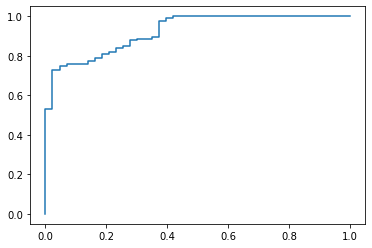

In [82]:
# sklearn ROC 패키지 제공
fpr, tpr, thresholds = metrics.roc_curve(train_y, train_y_pred_prob, pos_label=1)

# Print ROC curve
plt.plot(fpr,tpr)

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

# 실습예제4: Wine 데이터셋(다중범주분류)
※ 다중 클래스 로지스틱 회귀분석 실습: 분류하고자하는 타겟변수(class)가 2개 이상인 경우를 대상으로 실습을 수행해 보도록하겠습니다.

#### 모듈 불러오기

In [83]:
from IPython.display import display, HTML
import warnings
warnings.filterwarnings(action='ignore')

# 데이터 전처리
import numpy as np
import pandas as pd

# 기계학습 모델 및 평가
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

### 데이터 불러오기: Wine

In [84]:
wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [85]:
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.DataFrame(wine.target, columns=['target'])

data = pd.concat((X,y),axis=1)
display(data)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


### 데이터 전처리

### 데이터 shape 확인

In [86]:
print(f'관측치수 : {data.shape[0]} \n변수수 : {data.shape[1]}')

관측치수 : 178 
변수수 : 14


### 결측값 확인, 데이터 타입 확인 및 변경

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [88]:
data.target = data.target.astype('category')

### 간단한 요약 통계량 확인

In [89]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [90]:
data.target.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

### 타겟 변수의 클래스 비율 유지하며 Train/Test 데이터 분리
- 설명변수(X), 반응변수(y) 나누기

In [91]:
X = data.drop('target', axis=1)
X.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0


- Training 데이터 70% / Testing 데이터 30% 나누기
- 클래스 비율 유지: train_test_split 함수 내 stratify 옵션

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=2017020558, stratify=y)

### 정규화

In [93]:
preprocessor = preprocessing.Normalizer()
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

### 모델링
- sklearn.linear_model의 logistic 회귀모델 이용
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [94]:
model = LogisticRegression(penalty='none',
                           fit_intercept=True,
                           solver='newton-cg',
                           verbose=1, 
                           random_state=1234)
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


### 모델 결과 확인
- 정오행렬과 정확도 확인

In [95]:
print(f'학습 정오행렬 \n{confusion_matrix(y_train, pred_train)}')
print(f'테스트 정오행렬 \n{confusion_matrix(y_test, pred_test)}\n')
print(f'학습 정확도 : {accuracy_score(y_train, pred_train):.4f}')
print(f'테스트 정확도 : {accuracy_score(y_test, pred_test):.4f}')

학습 정오행렬 
[[41  0  0]
 [ 0 50  0]
 [ 0  0 33]]
테스트 정오행렬 
[[18  0  0]
 [ 2 19  0]
 [ 1  1 13]]

학습 정확도 : 1.0000
테스트 정확도 : 0.9259


# 실습예제5: Glass 데이터셋(다중범주분류)

In [96]:
# Required Python Packages
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split

##### 데이터 불러오기
이번에 실습에 사용할  데이터는 __UCI machine learning Repository__ 에서 제공하는 glass 데이터를 사용하고자 합니다.

Glass Data : "https://archive.ics.uci.edu/ml/datasets/Glass+Identification"

#### Glass Data 불러오기

In [97]:

glass_data_path = './data/glass.txt'
glass_data_variables = ["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "glass-type"]

glass_data = pd.read_csv(glass_data_path,names=glass_data_variables)


#### Data 확인하기

In [98]:
print( "Number of observations :: ", len(glass_data.index))
print( "Number of columns :: ", len(glass_data.columns))
print( "Headers :: ", glass_data.columns.values)

print(glass_data.head(20))

Number of observations ::  214
Number of columns ::  11
Headers ::  ['Id' 'RI' 'Na' 'Mg' 'Al' 'Si' 'K' 'Ca' 'Ba' 'Fe' 'glass-type']
    Id       RI     Na    Mg    Al     Si     K    Ca   Ba    Fe  glass-type
0    1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.00           1
1    2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.00           1
2    3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.00           1
3    4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.00           1
4    5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.00           1
5    6  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.0  0.26           1
6    7  1.51743  13.30  3.60  1.14  73.09  0.58  8.17  0.0  0.00           1
7    8  1.51756  13.15  3.61  1.05  73.24  0.57  8.24  0.0  0.00           1
8    9  1.51918  14.04  3.58  1.37  72.08  0.56  8.30  0.0  0.00           1
9   10  1.51755  13.00  3.60  1.36  72.99  0.57  8.40  0.0  0.11           1
10  11  1.51571  12.7

In [99]:
print( "Target :'glass-type' -", set(glass_data["glass-type"]))

Target :'glass-type' - {1, 2, 3, 5, 6, 7}


### 학습 검증 데이터 정의

***train_test_split( )*** 함수는 특적 array나 matrix을 학습과 검증데이터로 나누어주는 함수입니다.

**arrays* : sequence of indexables with same length / shape[0]
Allowed inputs are lists, numpy arrays, scipy-sparse matrices or pandas dataframes.

**test_size** : float, int or None, optional (default=0.25)
If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. If int, represents the absolute number of test samples. If None, the value is set to the complement of the train size. By default, the value is set to 0.25. The default will change in version 0.21. It will remain 0.25 only if train_size is unspecified, otherwise it will complement the specified train_size.

**train_size** : float, int, or None, (default=None)
If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split. If int, represents the absolute number of train samples. If None, the value is automatically set to the complement of the test size.

**random_state** : int, RandomState instance or None, optional (default=None)
If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.

**shuffle** : boolean, optional (default=True)
Whether or not to shuffle the data before splitting. If shuffle=False then stratify must be None.

**stratify** : array-like or None (default=None)
If not None, data is split in a stratified fashion, using this as the class labels.

In [100]:

train_x, test_x, train_y, test_y = train_test_split(glass_data[glass_data_variables[:-1]],
                                                    glass_data[glass_data_variables[-1]],
                                                    train_size=0.7)




In [101]:
# 다중 선형회귀 분석 수행
model = LogisticRegression(penalty='none',
                           fit_intercept=True,
                           solver='newton-cg',
                           verbose=1, 
                           random_state=1234)

model.fit(train_x, train_y)
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

# 다중 선형회귀 분석
print( "Multinomial Logistic regression Train Accuracy :: ", metrics.accuracy_score(train_y, pred_train))
print( "Multinomial Logistic regression Test Accuracy :: ", metrics.accuracy_score(test_y, pred_test))

Multinomial Logistic regression Train Accuracy ::  1.0
Multinomial Logistic regression Test Accuracy ::  1.0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [102]:
print(f'학습 정오행렬 \n{confusion_matrix(train_y, pred_train)}')
print(f'테스트 정오행렬 \n{confusion_matrix(test_y, pred_test)}\n')


학습 정오행렬 
[[44  0  0  0  0  0]
 [ 0 57  0  0  0  0]
 [ 0  0 13  0  0  0]
 [ 0  0  0 10  0  0]
 [ 0  0  0  0  4  0]
 [ 0  0  0  0  0 21]]
테스트 정오행렬 
[[26  0  0  0  0  0]
 [ 0 19  0  0  0  0]
 [ 0  0  4  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  5  0]
 [ 0  0  0  0  0  8]]



In [103]:
print(f'학습 정확도 : {accuracy_score(train_y, pred_train):.4f}')
print(f'테스트 정확도 : {accuracy_score(test_y, pred_test):.4f}')

학습 정확도 : 1.0000
테스트 정확도 : 1.0000
